In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
player_playoff_stats = pd.read_excel("data_files/Playoff Player Stats.xlsx")
player_playoff_stats = player_playoff_stats[['Year', 'Age', 'Team', 'Lg', 'Round', 'W/L', 'Opp', 'G', 'W', 'L']]

In [91]:

player_playoff_stats['Year'] = pd.to_numeric(player_playoff_stats['Year'], errors='coerce')
player_playoff_stats


,Year,Age,Team,Lg,Round,W/L,Opp,G,W,L
0,1985.0,21.0,CHI,1985.0,EC1,L (1-3),MIL,4.0,1.0,3.0
1,1986.0,22.0,CHI,1986.0,EC1,L (0-3),BOS,3.0,0.0,3.0
2,1987.0,23.0,CHI,1987.0,EC1,L (0-3),BOS,3.0,0.0,3.0
3,1988.0,24.0,CHI,1988.0,EC1,W (3-2),CLE,5.0,3.0,2.0
4,1988.0,24.0,CHI,1988.0,ECS,L (1-4),DET,5.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...
93,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2023.0,38.0,LAL,2023.0,WC1,W (4-2),MEM,6.0,4.0,2.0
95,2023.0,38.0,LAL,2023.0,WCS,W (4-2),GSW,6.0,4.0,2.0
96,2023.0,38.0,LAL,2023.0,WCF,L (0-4),DEN,4.0,0.0,4.0


In [92]:
# split 2 df
lebron_df = player_playoff_stats[player_playoff_stats.Year>2003]
jordan_df = player_playoff_stats[player_playoff_stats.Year<=2003]
jordan_df.tail()

,Year,Age,Team,Lg,Round,W/L,Opp,G,W,L
35,1998.0,34.0,CHI,1998.0,ECS,W (4-1),CHH,5.0,4.0,1.0
36,1998.0,34.0,CHI,1998.0,ECF,W (4-3),IND,7.0,4.0,3.0
37,1998.0,34.0,CHI,1998.0,FIN,W (4-2),UTA,6.0,4.0,2.0
38,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
print(f"Jordan failed to make the playoffs {jordan_df['Round'].isna().sum()} times in his {jordan_df['Year'].nunique()} season career. Lebron failed to make the playoffs {lebron_df['Round'].isna().sum()} times in his {lebron_df['Year'].nunique()} season career. ")

Jordan failed to make the playoffs 2 times in his 15 season career. Lebron failed to make the playoffs 4 times in his 21 season career. 


In [98]:

print(f"Jordan made the finals {(jordan_df['Round'] == 'FIN').sum()} times in his {jordan_df['Year'].nunique()} season career. Lebron made the finals {(lebron_df['Round'] == 'FIN').sum()} times in his {lebron_df['Year'].nunique()} season career.")

Jordan made the finals 6 times in his 15 season career. Lebron made the finals 10 times in his 21 season career.


In [171]:
# Find out each year how far players make it in the playoffs
vc1 = jordan_df.groupby('Year')[['Round']].last().value_counts().rename('Jordan')
vc2 = lebron_df.groupby('Year')[['Round']].last().value_counts().rename('Lebron')
combined_vc = pd.concat([vc1, vc2], axis=1).fillna(0)
combined_vc = combined_vc.reset_index()

In [174]:
combined_vc['Round'].replace({
    'FIN': 'Finals',
    'ECF': 'Conference Finals',
    'WCF': 'Conference Finals',
    'ECS': 'Conference Semi Finals',
    'EC1': 'Conference First Round',
    'WC1': 'Conference First Round',
}, inplace=True)

In [175]:
combined_vc = combined_vc.groupby('Round').sum().reset_index()
combined_vc.loc[len(combined_vc)] = ['Not made the playoffs', '2', '4']

In [176]:
combined_vc[['Jordan', 'Lebron']] = combined_vc[['Jordan', 'Lebron']].astype(int)
combined_vc = combined_vc.reindex([3, 0, 2, 1,4]).reset_index(drop=True)

In [177]:
combined_vc

,Round,Jordan,Lebron
0,Finals,6,10
1,Conference Finals,2,2
2,Conference Semi Finals,2,3
3,Conference First Round,3,2
4,Not made the playoffs,2,4


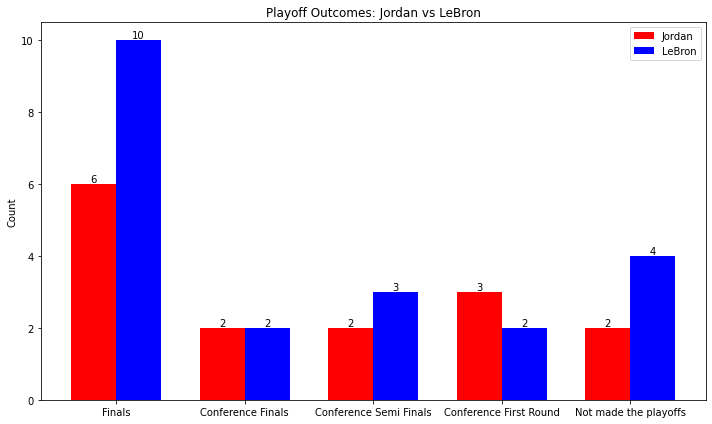

In [178]:
plt.figure(figsize=(10, 6))

x = np.arange(len(combined_vc['Round']))
width = 0.35

plt.bar(x - width/2, combined_vc['Jordan'], width, label='Jordan', color="red")
plt.bar(x + width/2, combined_vc['Lebron'], width, label='LeBron', color="blue")

plt.xticks(x, combined_vc['Round'])
plt.ylabel('Count')
plt.title('Playoff Outcomes: Jordan vs LeBron')
plt.legend()

bars_jordan = plt.bar(x - width/2, combined_vc['Jordan'], width, color='red', label='Jordan')
bars_lebron = plt.bar(x + width/2, combined_vc['Lebron'], width, color='blue', label='LeBron')
for bar in bars_jordan:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom')
for bar in bars_lebron:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [187]:
# Now I am trying to find out all the opponents both players faced in the Finals
player_playoff_stats.loc[player_playoff_stats['Round'] == "FIN"]


,Year,Age,Team,Lg,Round,W/L,Opp,G,W,L
14,1991.0,27.0,CHI,1991.0,FIN,W (4-1),LAL,5.0,4.0,1.0
18,1992.0,28.0,CHI,1992.0,FIN,W (4-2),POR,6.0,4.0,2.0
22,1993.0,29.0,CHI,1993.0,FIN,W (4-2),PHO,6.0,4.0,2.0
29,1996.0,32.0,CHI,1996.0,FIN,W (4-2),SEA,6.0,4.0,2.0
33,1997.0,33.0,CHI,1997.0,FIN,W (4-2),UTA,6.0,4.0,2.0
37,1998.0,34.0,CHI,1998.0,FIN,W (4-2),UTA,6.0,4.0,2.0
47,2007.0,22.0,CLE,2007.0,FIN,L (0-4),SAS,4.0,0.0,4.0
58,2011.0,26.0,MIA,2011.0,FIN,L (2-4),DAL,6.0,2.0,4.0
62,2012.0,27.0,MIA,2012.0,FIN,W (4-1),OKC,5.0,4.0,1.0
66,2013.0,28.0,MIA,2013.0,FIN,W (4-3),SAS,7.0,4.0,3.0


In [ ]:
# Extract these teams reg season records.